# Group Assignment 3

## By Juliette Oliver and Adam Kaba

As the olympics are a worldwide event, historically taking place every 4 years for over 100 years. The olympics are bound to have many impacts in every sector such as social and economical effects. We were able to find much data on the economic side, however it's been hard to find social data.

However since twitter is one of the largest forms of social media in the world, it seems like the perfect place to potentially pinpoint some social impacts of the olympics. This is what we will be trying to do.

We start by importing the libraries

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import osmnx as ox
import matplotlib.pyplot as plt

# to get tweets
import tweepy as tw

# for sentiment analysis
from textblob import TextBlob
import re

# word clouds
from wordcloud import WordCloud, STOPWORDS

Next is to set up tweepy to read in tweets

In [2]:
consumer_key= 'zuTFZBboQvly56KmotcIG4wm1'
consumer_secret= 'XNfbpZcOP1R8DmkjgTJdCiuh5Rud6T7alzvVO1Epzf4AG0FOEF'
access_token= '3183518040-4FjfAIfd7zwZYS4qgX3cEENKnSJJQgZ9lpH6NoO'
access_token_secret= 'koAYo16Z08Pg1thp3yeim3uadbPzhKWcvIchWOdCFLhrN'

In [3]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

Since our topic is on the olympics, first we'll get a feel for the social landscape without any other specifics

In [21]:
# search query
searchterm = 'olympics'

# filter out retweets (optional of course)
q = searchterm + " -filter:retweets"

# how many?
max_tweets = 500
 
# Creation of query method using parameters
tweets = tw.Cursor(api.search,
                   q=q, 
                   tweet_mode='extended').items(max_tweets)

In [18]:
for index, tweet in enumerate(tweets):
    print(index, tweet.full_text)

0 Speaking of which, I visited Miyagi and the Miyagi stadium 2 years ago to see what the situation looks like and what local residents think about the Olympics. Here’s my article:

'Recovery Olympics' moniker for 2020 Games rubs 3/11 evacuees the wrong way.
https://t.co/EVXdhnOZnC
1 @jt_mag_os Excuse me, please:
1. The region has not recovered yet.
2. The region does not need another disaster.
3. The Tokyo Olympics will hardly happen.
2 A majority of Japanese Paralympic sporting groups are worried about holding the Tokyo Paralympics this summer, mainly due to concerns it might help spread the coronavirus and worries about adequate preventive measures, opinion polls found.​ https://t.co/0NeAbRpQgL
3 @TravelLeisure Not really for the Olympics, but will be nice anyway.
4 Pela ordem está lindo @NBA @neymarjr faltou o @oscarschimidt maior cestinha das olimpíadas @Olympics https://t.co/UHxIgsRNAm
5 @EvanColeSaidSo I have ways lol none that i can say online 😂😂😂  you should also check out base

In [22]:
json_data = [tweet._json for tweet in tweets]
df = pd.json_normalize(json_data)
df.head()

,created_at,id,id_str,full_text,truncated,display_text_range,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,...,quoted_status.place.country,quoted_status.place.contained_within,quoted_status.place.bounding_box.type,quoted_status.place.bounding_box.coordinates,quoted_status.quoted_status_id,quoted_status.quoted_status_id_str,geo.type,geo.coordinates,coordinates.type,coordinates.coordinates
0,Wed Feb 24 01:47:15 +0000 2021,1364391406157107203,1364391406157107203,Also we should light the Olympic flame with La...,False,"[0, 89]","<a href=""http://twitter.com/download/android"" ...",1.364389e+18,1364389236804358146,1.363603e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Wed Feb 24 01:47:02 +0000 2021,1364391354566987777,1364391354566987777,Majority of Japanese Paralympic groups worried...,False,"[0, 97]","<a href=""https://dlvrit.com/"" rel=""nofollow"">d...",NaN,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Wed Feb 24 01:46:40 +0000 2021,1364391260539084800,1364391260539084800,"Speaking of which, I visited Miyagi and the Mi...",False,"[0, 279]","<a href=""http://twitter.com/download/iphone"" r...",1.364390e+18,1364389963660369924,8.832568e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Wed Feb 24 01:45:39 +0000 2021,1364391007048126467,1364391007048126467,"@jt_mag_os Excuse me, please:\n1. The region h...",False,"[11, 154]","<a href=""https://mobile.twitter.com"" rel=""nofo...",1.364390e+18,1364389963660369924,8.832568e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Wed Feb 24 01:45:06 +0000 2021,1364390869051260929,1364390869051260929,A majority of Japanese Paralympic sporting gro...,False,"[0, 264]","<a href=""https://trueanthem.com/"" rel=""nofollo...",NaN,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Theres a lot of columns so we'll just select the useful ones.

In [26]:
df = df[['created_at','full_text','user.screen_name','geo','coordinates', 'retweet_count', 'favorite_count']]

In [29]:
pd.set_option('display.max_colwidth', None)
df.head(5)

,created_at,full_text,user.screen_name,geo,coordinates,retweet_count,favorite_count
0,Wed Feb 24 01:47:15 +0000 2021,Also we should light the Olympic flame with Larry Nassar if we ever do the Olympics again,goat_classic,NaN,NaN,0,0
1,Wed Feb 24 01:47:02 +0000 2021,"Majority of Japanese Paralympic groups worried about Olympics, polls show https://t.co/AJvz1jK1zt",MMCAnchor,NaN,NaN,0,0
2,Wed Feb 24 01:46:40 +0000 2021,"Speaking of which, I visited Miyagi and the Miyagi stadium 2 years ago to see what the situation looks like and what local residents think about the Olympics. Here’s my article:\n\n'Recovery Olympics' moniker for 2020 Games rubs 3/11 evacuees the wrong way.\nhttps://t.co/EVXdhnOZnC",jt_mag_os,NaN,NaN,0,0
3,Wed Feb 24 01:45:39 +0000 2021,"@jt_mag_os Excuse me, please:\n1. The region has not recovered yet.\n2. The region does not need another disaster.\n3. The Tokyo Olympics will hardly happen.",ForTheF44508168,NaN,NaN,0,0
4,Wed Feb 24 01:45:06 +0000 2021,"A majority of Japanese Paralympic sporting groups are worried about holding the Tokyo Paralympics this summer, mainly due to concerns it might help spread the coronavirus and worries about adequate preventive measures, opinion polls found.​ https://t.co/0NeAbRpQgL",ReutersSports,NaN,NaN,0,0


Cleaning the text

In [30]:
def clean_tweet(tweet):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", tweet).split())

In [31]:
df['clean_text'] = ''

In [33]:
for i, row in df.iterrows():
    clean = clean_tweet(row.full_text)
    df.at[i,'clean_text'] = clean

In [35]:
allwords =  ' '.join(df['clean_text'])

Added some stopwords that are used a lot in the tweets, but dont really tell us much.

In [47]:
stop_words = [searchterm,'year','will','game','games', 'olympic','Im'] + list(STOPWORDS) 

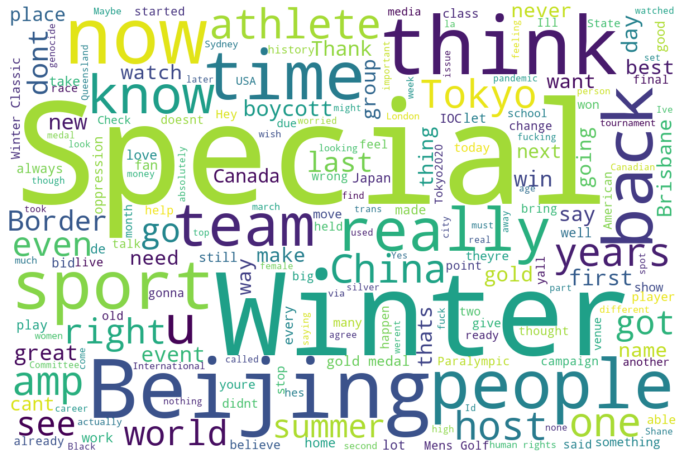

In [48]:
wordcloud = WordCloud(width=1200, 
                      height=800,
                      background_color="white",
                      stopwords=stop_words).generate(allwords)

# Display the WordCloud                    
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

This word cloud was eye opening. Somehow, neither of us had thought of the special olympics despite it likely being
one of the largest social game changers. Other than that, this tells us that a lot of social discourse revolves around places and time periods. This is likely people discussing their favorite moments from x or y games.

We decided to look at the top interacted with tweets to see what most of the "buzz" so to speak is about.

In [156]:
df.sort_values("favorite_count",ascending = False)['clean_text'][1:5]

451                                                            Australia all but certain to host 2032 Olympic Games and Paralympics in Brisbane DETAILS
441    The PM has put her foot down over use of a plastic water bottle at press conferences And has given him a present a NZ Team Olympics drink bottle
330              Hey we heard youre looking to host your next event in Australia We recommend this venue assuming it doesnt clash with the footy season
346                                                                                           Brisbane already has an Olympics its called Magic Weekend
Name: clean_text, dtype: object

It seems that the top discourse is currently discussing Australia being selected to hold the olympics in the near future.

Next, we'll see if sentiment and/or discourse changes in different locations.

To do this we'll be analyzing tweets from England, another english speaking country that hosted the olympics in 2012.

In [84]:
tweets = tw.Cursor(api.search,
                   q=q,
                   geocode='51.51753,-0.11214,50km', 
                   tweet_mode='extended').items(max_tweets)

In [85]:
json_data = [tweet._json for tweet in tweets]
df2 = pd.json_normalize(json_data)

Extract the same variables

In [86]:
df2 = df2[['created_at','full_text','user.screen_name','geo','coordinates', 'retweet_count', 'favorite_count']]
pd.set_option('display.max_colwidth', None)
df2.head(5)

,created_at,full_text,user.screen_name,geo,coordinates,retweet_count,favorite_count
0,Wed Feb 24 00:44:26 +0000 2021,"@wildey_1 @hurricanehorton Olympics, Euro Champs, Wimbledon; how high do you think the BBC’s priorities are with the World Champs up against them? 🤔",Ed25Terror,NaN,NaN,0,0
1,Tue Feb 23 23:08:04 +0000 2021,Rewatching the 2012 London Olympics opening ceremony and oh my god what a spectacle. Absolutely love it,greytrain1,NaN,NaN,0,0
2,Tue Feb 23 23:02:38 +0000 2021,"@BrexitPartridge Too right. I think I should be allowed to enter the 100m at next Olympics - and I need additional benefits cos I'm white, not a runner with privileged DNA so I'll start at the 10m marker - catch me if you can, mah brudders!",Greg_Tanner,NaN,NaN,0,1
3,Tue Feb 23 22:47:29 +0000 2021,"Barry Hearn speaking to ITV about the World Championship: 'We are going with our traditional date, our traditional venue. We didn't last year because we knew the Olympics was going to be cancelled. Because we need certainty for our players, we have to give them that assurance.'",Nick_Metcalfe,NaN,NaN,0,3
4,Tue Feb 23 22:42:29 +0000 2021,@vaginapoIice @Slatzism Watching it now! The spunky maid from ROBONIA gets perfect scores form *this* robot Olympics judge ever time.,DavidSTaylor1,NaN,NaN,0,2


In [133]:
df2['clean_text'] = ''
for i, row in df2.iterrows():
    clean = clean_tweet(row.full_text)
    df2.at[i,'clean_text'] = clean

Simillar stop words, however we excluded the location since its a search factor

In [139]:
allwords2 =  ' '.join(df2['clean_text'])
stop_words = [searchterm,'year','will','game','games', 'olympic','Im','olympics','London'] + list(STOPWORDS) 

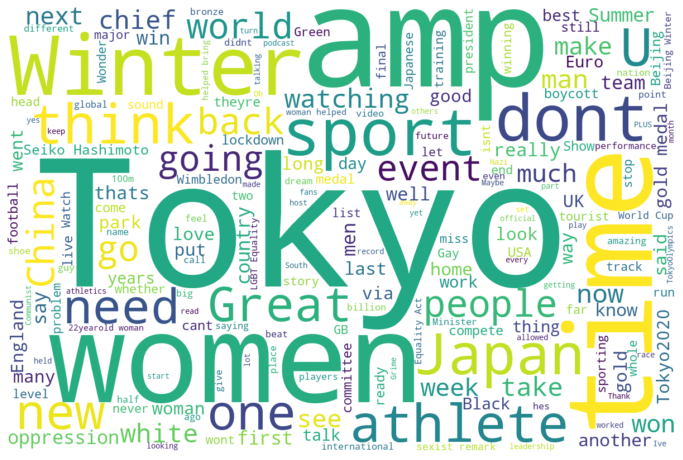

In [140]:
wordcloud = WordCloud(width=1200, 
                      height=800,
                      background_color="white",
                      stopwords=stop_words).generate(allwords2)

# Display the WordCloud                    
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

This word cloud contains the same essence but actually differs a little. For one, the people in England seem to be thinking more in terms of the near future, with the olympic games last year being cancelled. amp is widely used, however we are unsure what this means. Our biggest takeaway from this is that women is a widely used word. This leads us to believe England is fairly cognizant and progressive in their attitudes towards an increasing womens presence in the olympics

We decided to look at the top tweets from this selection again.

In [160]:
df2.sort_values("retweet_count",ascending = False)['clean_text'][1:5]

178                                                           My Guardian column today Track and fields record books are being torched in the sports equivalent of Year Zero thanks to the super spikes so why the omert from athletes around the new tech with expert input from amp
185                                                                                                                                   Whenever I need motivation I just watch Iranian weightlifter Hossein Rezazadeh screaming Ya Abalfazl at the Olympics and breaking world records
331                                                                                  Cece is asking for funding in order to be the first black female in transition to compete at the Olympics Im not posting this to mock Cece but to show how bloody unfair this sporting system is
111    If UK exits lockdown amp all is ok the Covid vaccine will become a new symbol of who we are Confident Innovative Charitable Global leaders Olympics 2012 hailed

Top social discourse seems fairly spread out here. Some discussion concerning covid lockdowns, however the tweet that sticks out to us is:

In [163]:
df2.loc[185,'clean_text']

'Whenever I need motivation I just watch Iranian weightlifter Hossein Rezazadeh screaming Ya Abalfazl at the Olympics and breaking world records'

Its a very simple tweet, however its very indicative of an effect even just the ripples of the olympics make.

We then decided to search tweets surrounding the special olympics, as we were inspired earlier.

In [128]:
# search query
searchterm = 'special olympics'

# filter out retweets (optional of course)
q = searchterm + " -filter:retweets"

# how many?
max_tweets = 500
 
# Creation of query method using parameters
tweets = tw.Cursor(api.search,
                   q=q, 
                   tweet_mode='extended').items(max_tweets)

In [129]:
json_data = [tweet._json for tweet in tweets]
df3 = pd.json_normalize(json_data)

Select the same columns

In [131]:
df3 = df3[['created_at','full_text','user.screen_name','geo','coordinates', 'retweet_count', 'favorite_count']]
pd.set_option('display.max_colwidth', None)
df3.head(5)

,created_at,full_text,user.screen_name,geo,coordinates,retweet_count,favorite_count
0,Wed Feb 24 03:59:29 +0000 2021,The Wooderboys Pod w/ @alexsingleton49 is up early on YouTube!\n\n-He guarantees he'll break the @Eagles single season tackle record\n-His role in Special Olympics &amp; the #InclusionRevolution\n-How to get @johngaudreau03 on the Flyers\n\nhttps://t.co/17D8Lxtqql,wooderboys,NaN,NaN,1,1
1,Wed Feb 24 03:58:45 +0000 2021,https://t.co/HJ2OVHfzzY\n\n@caleys_fanpage @GoodDoctorABC,CasarJacobson,NaN,NaN,0,0
2,Wed Feb 24 03:41:19 +0000 2021,"@TrentMeyerAg @ReginaRebels @ChevroletCanada @heroshockey @SportChek @CTJumpstart My sister was in Special Olympics, it is hard to understand how important such activities are to these kids - the inclusion, the team spirit, people believing they can.\n\nIt’s never ‘a little too much’. ❤️",KimRiel1,NaN,NaN,0,2
3,Wed Feb 24 03:40:04 +0000 2021,Is there like a verification process for the Special Olympics?\n\nLike do they gotta like diagnose you on-site if they have doubts or can you just pull a Cartman?,ThreeDPlusOne,NaN,NaN,0,0
4,Wed Feb 24 03:37:44 +0000 2021,We are currently in 2nd place and we want to be #1. Please consider donating our Student Council's Polar Plunge team to support North Dakota Special Olympics. Great kids help a better cause!\nhttps://t.co/tJbzhgDlw2,schroederms_gf,NaN,NaN,0,0


In [138]:
df3['clean_text'] = ''
for i, row in df3.iterrows():
    clean = clean_tweet(row.full_text)
    df3.at[i,'clean_text'] = clean

<ipython-input-138-992592c46a71>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['clean_text'] = ''


Same stopwords but tweaked a little

In [145]:
allwords3 =  ' '.join(df3['clean_text'])
stop_words = [searchterm,'year','will','game','games', 'olympic','Im','olympics','London','special'] + list(STOPWORDS) 

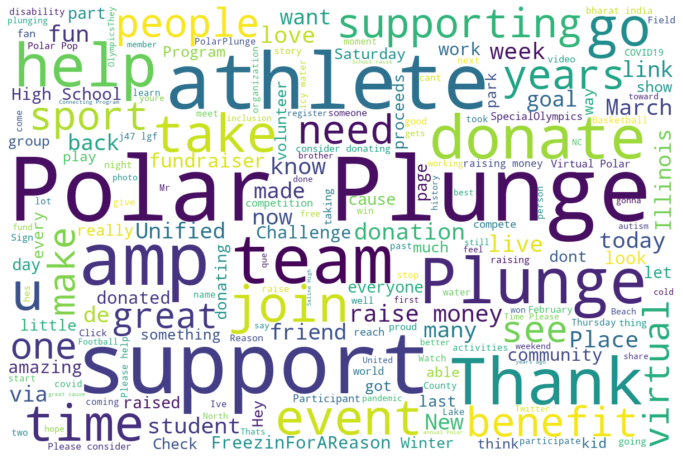

In [146]:
wordcloud = WordCloud(width=1200, 
                      height=800,
                      background_color="white",
                      stopwords=stop_words).generate(allwords3)

# Display the WordCloud                    
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

This seems to be the most telling word cloud. For one, this definitely seems to have the biggest positive reception. Many of the words here are optimistic. There appears to be a lot of tweets, of people trying to gather support for the special olympics. 

The polar plunge is a well known fundraising event to get people to raise money, that and the word donate make us think that there is a fairly large presence on twitter trying to help keep the special olympics alive. However, this makes us wonder why that is. Are the special olympics supported less than the regular olympics? Are the special olympics supported by the country at all? 

Like before we looked at the top tweets

In [166]:
df3.sort_values("retweet_count",ascending = False)['clean_text'][1:5]

474    Hey Twitter peeps We are still looking for a soccer coach for our Special Olympics delegation If anyone knows someone that would like to volunteer to coach Special Olympics soccer please let me know If I could also get some retweets to get the word out that would be awesome
218                                           HEY EVERYONE PLEASE HELPHelp David Schrader from HolzerFiles amp Darkness Radio amp his son Cliff from the Minneapolis Fire Dept with the PolarPlunge to support the Special Olympics Make donations here Polar Plunge for Special Olympics
375                                                                   41 years ago today the upset the Soviet Union at the Winter Olympics in Lake Placid on their way to a gold medal It was so special to visit the 1980 Herb Brooks Arena with my family this past summer MiracleOnIce
168                                                                                                                                                       

Somewhat in line with our hypothesis, many of the top tweets are to gather support for the event. 

One thing to keep in mind however, is that the tweets from over a week ago cant be retrieved without the premium api.The recency of the tweets and the relatively small sample size could be a source of bias and maybe not be representative of the population being examined, as many of the tweets are very recent and havent had much time to be interacted with by the community.

Overall, the twitter analysis was fairly successful, we were able to look at public discourse surrounding the olympics as a whole. On top of that we were able to analyze specific sentiments in specific countries, where we found that england might be the most progressive in terms of womens events in the olympics. 

The realization of the special olympics is huge as well, as it is a large form of social change. The word cloud surrounding the special olympics also raises some more questions though. Why exactly do the special olympics require so much more local/public support than the normal or winter olympics. Our next steps will probably be to look into the history of the special olympics and potentially find some data sources concerning costs and attendance of the special olympics.

The work on this group assignment was largely collaborative. Adam wrote much of the code and formatting. Juliette came up with many of the ideas and potential angles we should approach from.